### Description of the dataset

Daily weather observations from numerous weather stations

### Features description


Date: The date of observation

Location:  The location

MinTemp: The minimum temperature in degrees celsius

MaxTemp: The maximum temperature in degrees celsius

Rainfall: The amount of rainfall recorded for the day in mm

Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine: The number of hours of bright sunshine in the day.

WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am: Direction of the wind at 9am

WindDir3pm: Direction of the wind at 3pm

WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am: Humidity (percent) at 9am

Humidity3pm: Humidity (percent) at 3pm

Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of                    eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates                    completely clear sky whilst an 8 indicates that it is completely overcast.

Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm.

Temp9am: Temperature (degrees C) at 9am


Temp3pm: Temperature (degrees C) at 3pm

RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RISK_MM: The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of  measure of the "risk".


RainTomorrow: The target variable. Did it rain strongly tomorrow (flood will happen)?, this variable will be our target in the future

### Source

As I cannot find a dataset for Scotland in the open data websites, I created this dataset just for simulation and I have focused on Stirling city it had surface water flooding this year. I can ensure that 70 percent of the values are real, not added randomly because I have referenced on historic weather data. 

### Reference

https://www.timeanddate.com/weather/uk/stirling/historic

http://data.orc.govt.nz/

In [62]:
import pandas as pd #Data loading and preprocessing
import numpy as np #Matrix Operation
#Plotting;
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
#For encoding the features
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
import warnings
warnings.filterwarnings("ignore")

In [160]:
data=pd.read_csv("/root/Desktop/Stirling.csv")
data.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,169904,2008-07-01,Stirling,20.0,33.1,0.0,4.4,11.0,E,41.0,...,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,No,0.0,No
1,169905,2008-07-02,Stirling,19.4,32.4,0.0,6.0,10.4,ENE,50.0,...,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,No,0.0,No
2,169906,2008-07-03,Stirling,18.2,31.8,0.0,8.0,11.0,E,46.0,...,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2,No,0.0,No
3,169907,2008-07-04,Stirling,17.3,30.7,0.0,7.0,10.4,E,44.0,...,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8,No,0.0,No
4,169908,2008-07-05,Stirling,15.5,30.8,0.0,7.0,10.8,ESE,46.0,...,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6,No,0.0,No


In [161]:
data.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

### Objective

Predict whether or not it will flood tomorrow by training a binary classification model on target RainTomorrow.

### 1-Cleaning the Data :


In [162]:
data.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,169904,2008-07-01,Stirling,20.0,33.1,0.0,4.4,11.0,E,41.0,...,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,No,0.0,No
1,169905,2008-07-02,Stirling,19.4,32.4,0.0,6.0,10.4,ENE,50.0,...,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,No,0.0,No
2,169906,2008-07-03,Stirling,18.2,31.8,0.0,8.0,11.0,E,46.0,...,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2,No,0.0,No
3,169907,2008-07-04,Stirling,17.3,30.7,0.0,7.0,10.4,E,44.0,...,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8,No,0.0,No
4,169908,2008-07-05,Stirling,15.5,30.8,0.0,7.0,10.8,ESE,46.0,...,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6,No,0.0,No


In [163]:
data.drop_duplicates(inplace=True)
data.isnull().any()


Unnamed: 0       False
Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am          False
Temp3pm           True
RainToday         True
RISK_MM           True
RainTomorrow      True
dtype: bool

#### we have to fill the null values

So let's check if it's balanced or not

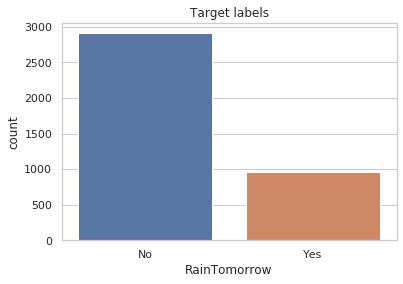

In [164]:
sns.set(style="whitegrid")
sns.countplot(data.RainTomorrow)
plt.title("Target labels")
plt.show()


From above plot it is clear that data set is imbalanced

In [165]:
#Separating the data based on its class label.
data_yes = data[data['RainTomorrow']=='Yes']
data_no = data[data['RainTomorrow']=='No']

Now let's replace the NaN values with 0 and WindGustSpeed -- replacing with median


In [166]:
#For Temparatures we cannot replace NaN values with 0, hence replacing NaN with its respective mode value
data_yes['MinTemp'].fillna(value=data_yes['MinTemp'].mode()[0],inplace=True )
data_no['MinTemp'].fillna(value=data_no['MinTemp'].mode()[0],inplace=True )

data_yes['MaxTemp'].fillna(value=data_yes['MaxTemp'].mode()[0],inplace=True )
data_no['MaxTemp'].fillna(value=data_no['MaxTemp'].mode()[0],inplace=True )


data_yes['Temp9am'].fillna(value=data_yes['Temp9am'].mode()[0],inplace=True )
data_no['Temp9am'].fillna(value=data_no['Temp9am'].mode()[0],inplace=True )

data_yes['Temp3pm'].fillna(value=data_yes['Temp3pm'].mode()[0],inplace=True )
data_no['Temp3pm'].fillna(value=data_no['Temp3pm'].mode()[0],inplace=True )


# For humidity also 
data_yes['Humidity9am'].fillna(value=data_yes['Humidity9am'].mode()[0],inplace=True )
data_no['Humidity9am'].fillna(value=data_no['Humidity9am'].mode()[0],inplace=True )



data_yes['Humidity3pm'].fillna(value=data_yes['Humidity3pm'].mode()[0],inplace=True )
data_no['Humidity3pm'].fillna(value=data_no['Humidity3pm'].mode()[0],inplace=True )

# For the rain fall feature we can replace NaN with 0.0 which says there is no rain fall
data_yes['Rainfall'].fillna(value=0.0,inplace=True)
data_no['Rainfall'].fillna(value=0.0,inplace=True)


data_yes['Pressure9am'].fillna(value=data_yes['Pressure9am'].median(),inplace=True )
data_no['Pressure9am'].fillna(value=data_no['Pressure9am'].median(),inplace=True )

data_yes['Pressure3pm'].fillna(value=data_yes['Pressure3pm'].median(),inplace=True )
data_no['Pressure3pm'].fillna(value=data_no['Pressure3pm'].median(),inplace=True )


data_yes['WindSpeed9am'].fillna(value=data_yes['WindSpeed9am'].median(),inplace=True )
data_no['WindSpeed9am'].fillna(value=data_no['WindSpeed9am'].median(),inplace=True )

data_yes['WindSpeed3pm'].fillna(value=data_yes['WindSpeed3pm'].median(),inplace=True )
data_no['WindSpeed3pm'].fillna(value=data_no['WindSpeed3pm'].median(),inplace=True )

#WindGustSpeed -- replacing with median
data_yes['WindGustSpeed'].fillna(value=data_yes['WindGustSpeed'].median(),inplace=True)
data_no['WindGustSpeed'].fillna(value=data_no['WindGustSpeed'].median(),inplace=True)

In [167]:
# For RainToday feature we cannot fill any value, so better to remove the NaN values 
data_yes.dropna(inplace=True)
data_no.dropna(inplace=True)

In [168]:
data_filled= data_yes.append(data_no, ignore_index=True)

In [169]:
data_filled.isnull().any()


Unnamed: 0       False
Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

Now, As we can see we don't have any NaN

In [170]:
# sorting the data based on date
data_filled=data_filled.sort_values(by='Date')
data_filled.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
894,169904,2008-07-01,Stirling,20.0,33.1,0.0,4.4,11.0,E,41.0,...,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,No,0.0,No
895,169905,2008-07-02,Stirling,19.4,32.4,0.0,6.0,10.4,ENE,50.0,...,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,No,0.0,No
896,169906,2008-07-03,Stirling,18.2,31.8,0.0,8.0,11.0,E,46.0,...,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2,No,0.0,No
897,169907,2008-07-04,Stirling,17.3,30.7,0.0,7.0,10.4,E,44.0,...,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8,No,0.0,No
898,169908,2008-07-05,Stirling,15.5,30.8,0.0,7.0,10.8,ESE,46.0,...,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6,No,0.0,No


In [171]:
#Removing unwanted features, RISK_MM is same as target label hence removing with data and loaction  
train_test = data_filled.drop(['Date', 'Location','RISK_MM'], axis=1)
train_test.head()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
894,169904,20.0,33.1,0.0,4.4,11.0,E,41.0,ENE,SSE,...,81.0,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,No,No
895,169905,19.4,32.4,0.0,6.0,10.4,ENE,50.0,SE,E,...,81.0,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,No,No
896,169906,18.2,31.8,0.0,8.0,11.0,E,46.0,ESE,ENE,...,38.0,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2,No,No
897,169907,17.3,30.7,0.0,7.0,10.4,E,44.0,SE,E,...,55.0,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8,No,No
898,169908,15.5,30.8,0.0,7.0,10.8,ESE,46.0,E,E,...,37.0,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6,No,No


### 2-Data Preprocessing ( Encoding)

In [172]:
WindGustDir_encode = LabelEncoder()
train_test['WindGustDir']=WindGustDir_encode.fit_transform(data_final['WindGustDir'])

WindDir9am_encode = LabelEncoder()
train_test['WindDir9am']=WindDir9am_encode.fit_transform(data_final['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
train_test['WindDir3pm']=WindDir3pm_encode.fit_transform(data_final['WindDir3pm'])

RainToday_encode = LabelEncoder()
train_test['RainToday']=RainToday_encode.fit_transform(data_final['RainToday'])

RainTomorrow_encode = LabelEncoder()
train_test['RainTomorrow']=RainTomorrow_encode.fit_transform(data_final["RainTomorrow"])

In [173]:
Y= train_test['RainTomorrow']
X = train_test.drop(['RainTomorrow'],axis=1)

In [174]:
#let's split the data
from sklearn.model_selection import train_test_split

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.80)


In [176]:
# we have to have the same scale
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3-Modeling the data using Logisitic Regression


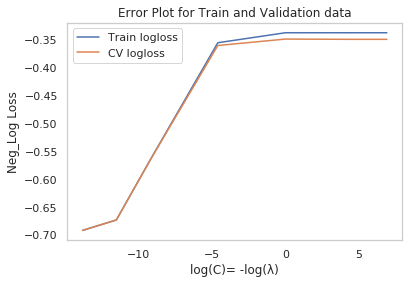

In [177]:
# we have to choose the best estimator(Hyper-parameter )
import math 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
def plotErrors(k,train,cv):
       
    plt.plot(k, train, label='Train logloss')
    plt.plot(k, cv, label='CV logloss')
    plt.legend()
    plt.xlabel("log(C)= -log(λ)")
    plt.ylabel("Neg_Log Loss")
    plt.title("Error Plot for Train and Validation data")
    plt.grid()
    plt.show()
parameters={'C':[10**-6,10**-5,10**-4, 10**-2, 10**0, 10**2, 10**3] }
log_c = list(map(lambda x : float(math.log(x)),parameters['C']))

clf_log = LogisticRegression(penalty='l2',class_weight='balanced')

clf = GridSearchCV(clf_log, parameters, cv=5, scoring='neg_log_loss',return_train_score =True)
clf.fit(X_train, y_train)

train_loss= clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 

plotErrors(k=log_c,train=train_loss,cv=cv_loss)


In [178]:
clf = clf.best_estimator_
clf

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [179]:
clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Feature interpretation


In [180]:
clf.coef_[0]


array([-0.0841552 ,  0.22837979, -0.01358062,  0.08857481,  0.03440467,
       -0.47057263, -0.04999207,  0.80242046, -0.18957207, -0.02881954,
       -0.13737851, -0.34663417,  0.20289957,  1.78746765,  1.20209298,
       -1.52667371, -0.11711636,  0.22903712,  0.58787853,  0.23414618,
        0.10996366])

In [181]:
feature_weights=sorted(zip(clf.coef_[0],X.columns.tolist()),reverse = True)
feature_weights

[(1.7874676547368804, 'Humidity3pm'),
 (1.2020929798208053, 'Pressure9am'),
 (0.8024204639364931, 'WindGustSpeed'),
 (0.5878785329960171, 'Temp9am'),
 (0.23414617684118708, 'Temp3pm'),
 (0.22903712154954523, 'Cloud3pm'),
 (0.22837978779011234, 'MinTemp'),
 (0.20289956657064007, 'Humidity9am'),
 (0.10996366287067129, 'RainToday'),
 (0.08857480884980515, 'Rainfall'),
 (0.03440466876429249, 'Evaporation'),
 (-0.013580617041265536, 'MaxTemp'),
 (-0.02881954295115836, 'WindDir3pm'),
 (-0.04999207164501071, 'WindGustDir'),
 (-0.08415520139010635, 'Unnamed: 0'),
 (-0.11711636022076573, 'Cloud9am'),
 (-0.13737851207458537, 'WindSpeed9am'),
 (-0.18957206773307836, 'WindDir9am'),
 (-0.3466341708937976, 'WindSpeed3pm'),
 (-0.4705726297421624, 'Sunshine'),
 (-1.526673712603836, 'Pressure3pm')]

Each weight corresponds to each feature, above are the sorted features based on its weight value. Higher weight value means higher important feature it is.

### 4- Model Evaluating


In [182]:
from sklearn.metrics import roc_auc_score,roc_curve,auc,log_loss,confusion_matrix
#Printing the log-loss for both trian and test data
train_loss = log_loss(y_train, clf.predict_proba(X_train)[:,1])
test_loss  =log_loss(y_test, clf.predict_proba(X_test)[:,1])


print("Log_loss on train data is :{}".format(train_loss))
print("Log_loss on test data is :{}".format(test_loss))

Log_loss on train data is :0.33950948526943764
Log_loss on test data is :0.30953835060172546


The model prefectly fitted as it's not +∞

##### Let's Test the model by giving some randomly values

In [204]:
def will_be_flood_on_this_conditions(x):
    
    x["WindGustDir"]=WindGustDir_encode.transform([x["WindGustDir"]])
    x["WindDir9am"]=WindDir9am_encode.transform([x["WindDir9am"]])
    x["WindDir3pm"]=WindDir3pm_encode.transform([x["WindDir3pm"]])
    x["RainToday"]=RainToday_encode.transform([x["RainToday"]])
    x=np.array(list((x.values())))
    final_x = scaler.transform(x.reshape(1, -1))
    chance=clf.predict_proba(final_x)[:,1]
    if chance>=0.5:
        print("Yes, there is a {} % chance of flood can fall on tommorow ".format(chance*100))
    else:
        print("No, there is only {}% chance of flood hence we cannot expect rain on tommorow ".format(chance*100))
    print("Because today's Humidity at 3pm ={}%,Atmosphereic Pressure at 9am={}millibars,and Wind Gust Speed ={}km/hr, which are very good sign for a strong rainfall"
          .format(Humidity3pm,Pressure9am,WindGustSpeed))

In [205]:
#Giving one query point here

MinTemp   = 16.2
MaxTemp   = 21.7
Rainfall   = 2.8
Evaporation   = 5.4
Sunshine   = 3.5
WindGustDir   = "NNW"
WindGustSpeed   = 80
WindDir9am   = "NNW"
WindDir3pm   = "NNW"
WindSpeed9am   = 20
WindSpeed3pm   = 13
Humidity9am   = 81
Humidity3pm   = 95
Pressure9am   = 1007.2
Pressure3pm   = 1006.1
Cloud9am   = 7
Cloud3pm   = 8
Temp9am   = 24.8
Temp3pm   = 22.4
RainToday   ="Yes"

In [209]:
#FeaturesInput = [MinTemp,MaxTemp,Rainfall,
        Evaporation,Sunshine,WindGustDir,
        WindGustSpeed,WindDir9am,WindDir3pm,
        WindSpeed9am,WindSpeed3pm,Humidity9am,
        Humidity3pm,Pressure9am,Pressure3pm,
        Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday]
x=dict()
for i,name in enumerate(column_names):
    x[name]=point[i]



In [207]:
will_be_flood_on_this_conditions(x)

Yes, there is a [98.29122] % chance of flood can fall on tommorow 
Because today's Humidity at 3pm =95%,Atmosphereic Pressure at 9am=1007.2millibars,and Wind Gust Speed =57km/hr, which are very good sign for a strong rainfall